In [1]:
# Step: General cleaning of the data
# 1. Identify the areas with the most accidents.
# 2. Most dangerous roads
# 3. Accidents across different seasons
# 4. Most dangerous days
# 5. Most important causes of the accidents
# 6. Create a predictive model to evaluate the probability of car accidents
# 7. Create dashboard

# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import folium
from sklearn.preprocessing import OrdinalEncoder
# from arcgis.gis import GIS


/Users/soyoung/anaconda2/lib/python2.7/site-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


In [2]:
# file name & path name
dir_curr = os.getcwd()
dir_car = '1-6m-accidents-traffic-flow-over-16-years'#'#os.listdir(dir_curr)[3]
accident_files = ['accidents_2005_to_2007.csv']#,'accidents_2009_to_2011.csv', 'accidents_2012_to_2014.csv']

In [3]:
# load csv data
car_list = []
for file in accident_files:
    file_fullname = dir_car + '/' + file
    car_one = pd.read_csv(file_fullname, index_col=None)
    car_list.append(car_one)

car_total = pd.concat(car_list, axis=0, ignore_index=True)
# car_total.to_csv('accidents_2005_to_2014.csv')

/Users/soyoung/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# feature selection
column_useless = ['Accident_Index','Location_Northing_OSGR','Location_Easting_OSGR','Police_Force',
'Local_Authority_(District)','Local_Authority_(Highway)','Junction_Detail','Junction_Control',
'Did_Police_Officer_Attend_Scene_of_Accident','LSOA_of_Accident_Location',
'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities']

car_total.drop(column_useless,1,inplace=True)
car_total.keys()

a = pd.to_datetime(car_total['Date'], dayfirst = True)
car_total['Month'] = a.dt.strftime('%m').astype(str)
car_total['Year'] = a.dt.strftime('%Y').astype(str)

In [5]:
# clean the data
# 1. Reorganize into time series data 
# Date/Time, then features of the accident
car_small = car_total#.iloc[0:1000,:]

datetime_value = pd.to_datetime(car_small['Date'], dayfirst = True).astype(str) + ' ' + (car_small['Time'].astype(str))
car_small['DateTime'] = datetime_value

# change column order
cols_orig = car_small.columns.tolist()
cols = cols_orig[-1:] + cols_orig[:-1]
car_small_new = car_small[cols]

# drop Date & time
# car_total_new.drop(['Date','Time'],1,inplace=True)
car_small_new.sort_values(by='DateTime', inplace=True)


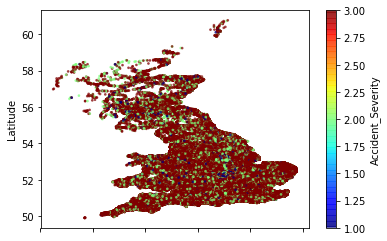

In [6]:
# 1. Identify the areas with the most accidents.
# visualize accidents in the map
car_example = car_small_new
def map_overlay(car_example):
    car_total.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.6, c='Accident_Severity',s=3, cmap = plt.get_cmap("jet"))
#     map_hooray = folium.Map(location=[51.5074, 0.1278], zoom_start = 10)

map_overlay(car_example)

# # Urban vs Rural area

In [17]:
map_hooray = folium.Map(location=[51.5074, 0.1278], zoom_start = 10)
map_hooray

[Text(0,0,u'10'),
 Text(0,0,u'15'),
 Text(0,0,u'20'),
 Text(0,0,u'30'),
 Text(0,0,u'40'),
 Text(0,0,u'50'),
 Text(0,0,u'60'),
 Text(0,0,u'70')]

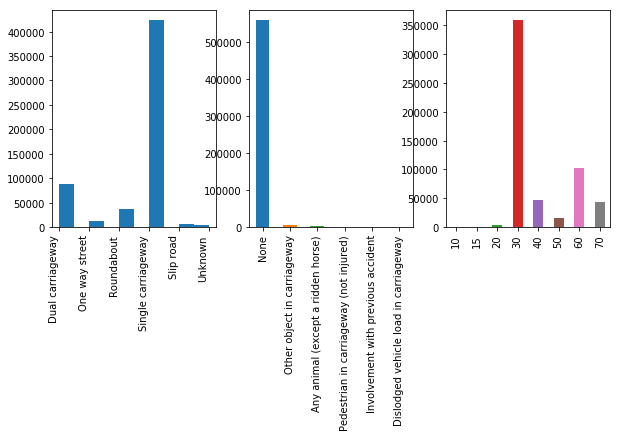

In [8]:
# 2. Most dangerous roads
def plot_roads(car_example):
    plt.hist(car_example['Road_Type'])
    plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')
    # plt.show()
f = plt.figure(figsize=(10,4))
f.add_subplot(1,3,1)
plot_roads(car_example)

# carriageway risk
f.add_subplot(1,3,2)
car_carriageway = car_example['Carriageway_Hazards'].value_counts()
ax = car_carriageway.plot(kind='bar', rot=90)
ax.set_xticklabels(car_carriageway.index)

# speed limit in the accident
f.add_subplot(1,3,3)
car_speedlimit = car_example['Speed_limit'].value_counts().sort_index()
ax2=(car_speedlimit.plot(kind='bar'))
ax2.set_xticklabels(car_speedlimit.index)

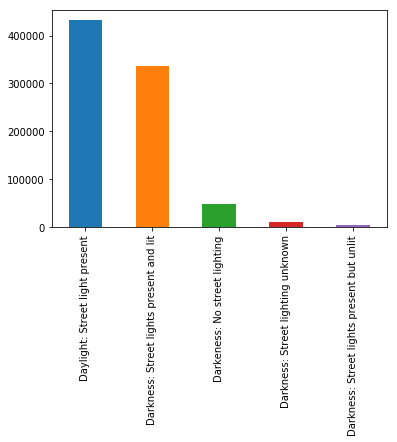

In [9]:
# number of vehicles in the accident
# for accident in n_accidents:
def plot_number_vehicle(car_example):
    car_example['Number_of_Vehicles'].value_counts().sort_index().plot(kind='bar')
    # plt.xlim(-1, 10)

# number of causalities
f.add_subplot(2,3,4)
plot_number_vehicle(car_total)
car_total['Number_of_Casualties'].value_counts().sort_index().plot(kind='bar')

# light conditions
f.add_subplot(2,3,5)
car_example['Light_Conditions'].value_counts().plot(kind='bar')
# road class
# car_total['1st_Road_Class'].value_counts()

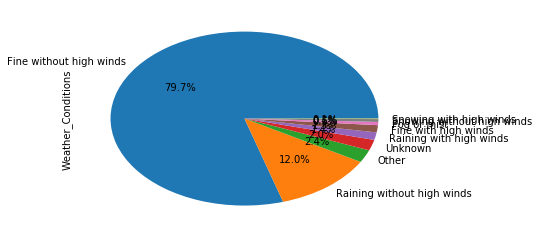

In [10]:
# ==== MUST SOLVE =====#
# plot by weather
def pie_chart_weather(car_example):
    car_weather = car_example['Weather_Conditions'].value_counts()
    car_weather.plot(kind='pie', y='Weather_Conditions', autopct='%1.1f%%', fontsize=10)
    # plt.show()

pie_chart_weather(car_example)

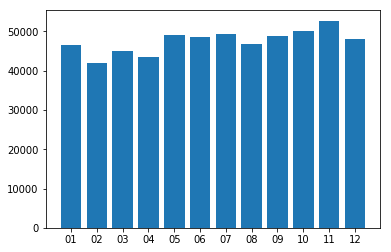

In [11]:
# === Month ===== #
def plot_by_month(car_example):
    # n_month = 12
    car_month = car_example['Month'].value_counts().sort_index()
    n_month = len(car_month)
    plt.bar(np.arange(n_month), car_month)
    plt.xticks(np.arange(n_month),car_month.index)
    plt.show()
plot_by_month(car_example)

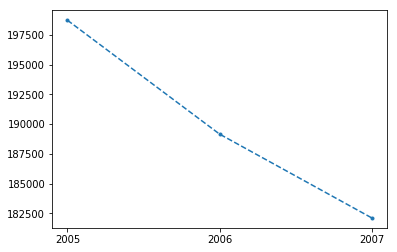

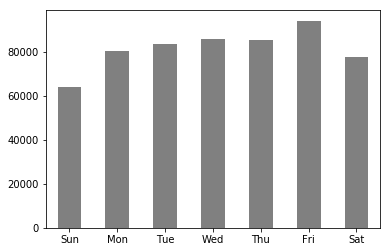

In [12]:
# 3. Accidents across different seasons
#==== Year ======#
def plot_by_year(car_example):
    car_year = car_example['Year'].value_counts().sort_index()
    n_year = len(car_year)
    plt.plot(np.arange(n_year), car_year, '.--')
    plt.xticks(np.arange(n_year),car_year.index)#year_list)
    plt.show()
plot_by_year(car_example)


# 4. Most dangerous days
# day of week
def bar_dayofweek(car_example):
    car_dayofweek = car_example['Day_of_Week'].value_counts().sort_index()
    DayNames = ['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    ax = car_dayofweek.plot.bar(x='Day_of_Week', color='gray')
    ax.set_xticklabels(DayNames, rotation=0)
    plt.show()
bar_dayofweek(car_example)

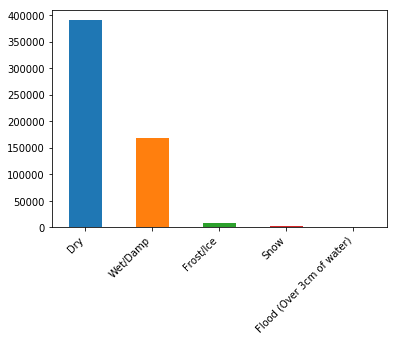

In [13]:
# 5. Most important causes of the accidents
# plot by road surface
def pie_chart_road_surf(car_example):
    car_conds = (car_example['Road_Surface_Conditions'].value_counts())
    # car_conds.plot(kind='pie', y='Road_Surface_Conditions', autopct='%1.1f%%',fontsize=10)
    car_conds.plot(kind='bar')
    plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
    plt.show()

pie_chart_road_surf(car_example)

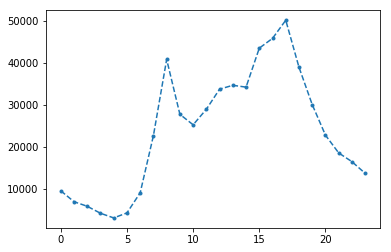

In [14]:
# 6. Create a predictive model to evaluate the probability of car accidents
# accident by each hour
def plot_by_hour(car_example):
    pd_hour = pd.to_datetime(car_example['Time'], format = '%H:%M').dt.hour
    car_time = pd_hour.value_counts().sort_index()
# car_time.plot(kind='line')
# car_time = plot_car_time(car_total)
    plt.plot(car_time, '.--')
    plt.show()

plot_by_hour(car_example)